In [1]:
# Import pandas as a alias 'pd'
import pandas as pd


# Load the CSV file "USA_Housing.csv"
usa_housing = pd.read_csv("./Desktop/Data Science/csv_file/USA_Housing.csv")


In [2]:
from sklearn.model_selection import train_test_split
X = usa_housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']]
y = usa_housing[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_train_hat = reg.predict(X_train)
print('train MAE :', mean_absolute_error(y_train, y_train_hat))
print('train RMSE :', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_squre :', r2_score(y_train, y_train_hat))

y_test_hat = reg.predict(X_test)
print('test MAE :', mean_absolute_error(y_test, y_test_hat))
print('test RMSE :', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_squre :', r2_score(y_test, y_test_hat))

train MAE : 146723.29951734174
train RMSE : 182619.61878494994
train R_squre : 0.7359325225461388
test MAE : 141066.44860989414
test RMSE : 178348.27510586515
test R_squre : 0.734321885513024


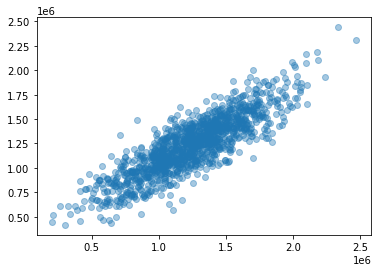

In [13]:
# R^2 = SSR / SST = 1 - SSE / SST <= Goodness of Fit
plt.scatter(y_test, y_test_hat, alpha=0.4)
plt.show()

In [14]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [15]:
y_train_hat = reg.predict(X_train)
print('train MAE :', mean_absolute_error(y_train, y_train_hat))
print('train RMSE :', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_squre :', r2_score(y_train, y_train_hat))

y_test_hat = reg.predict(X_test)
print('test MAE :', mean_absolute_error(y_test, y_test_hat))
print('test RMSE :', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_squre :', r2_score(y_test, y_test_hat))

train MAE : 146722.99203575164
train RMSE : 182619.62770687687
train R_squre : 0.7359324967439735
test MAE : 141065.99752493342
test RMSE : 178349.63325454664
test R_squre : 0.7343178391407834


In [7]:
dfX = pd.DataFrame(X_test)
dfy = pd.DataFrame(y_test, columns=["Price"])

In [8]:
df = pd.concat([dfX, dfy], axis=1)
# concat에서 dfy = pd.DataFrame(y_test_hat, columns=["Price"]) 값으로 진행할 경우 y_test_hat은 열의 값에 대한 데이터가 존재하지 않아 concat 과정에서 Price 데이터만 추가되는 현상이 발생한다.

df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price
4141,81054.509522,7.609819,5.536175,3.24,1.730103e+06
3168,88603.208776,7.097177,5.232616,2.16,1.675702e+06
2478,70085.947604,4.435761,7.131110,5.22,1.440909e+06
4214,53793.176477,6.461261,6.800895,2.30,1.047280e+06
4180,78757.681982,7.006157,5.943870,4.18,1.084763e+06


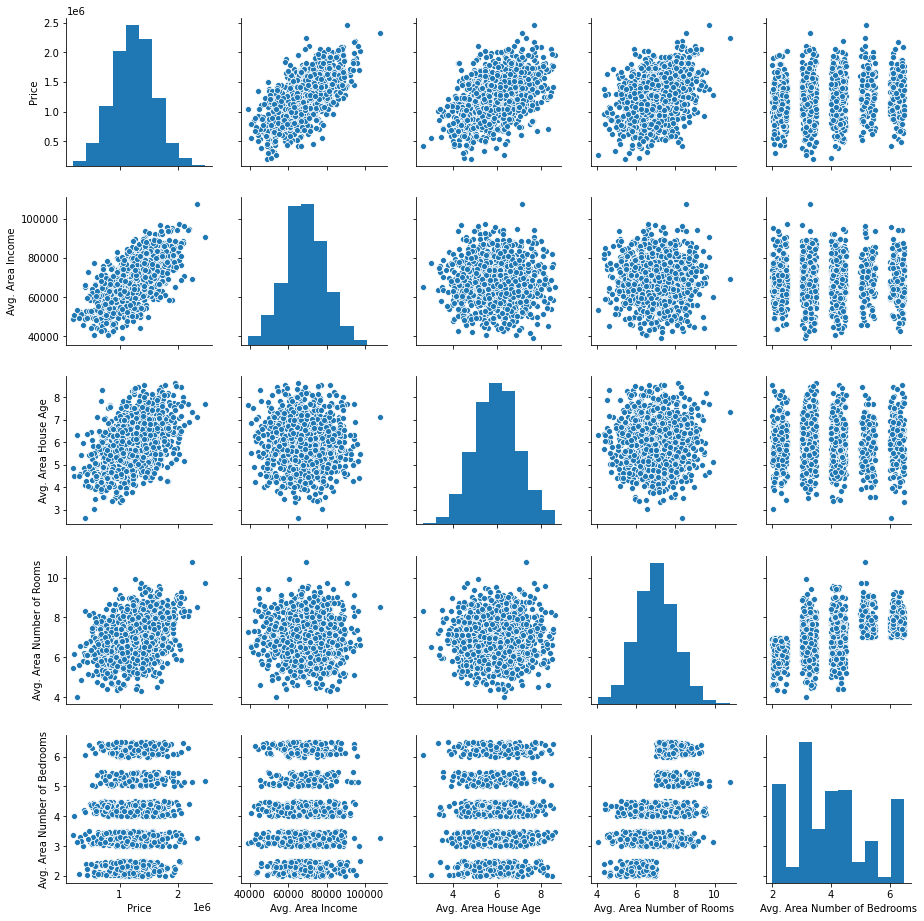

In [9]:
import seaborn as sns
import matplotlib.pylab as plt
sns.pairplot(df[['Price', 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms']])
plt.show()